In [1]:
import pandas as pd
import numpy as np
np.random.seed(34)

In this dataset we have 21 sensors which will be reffered to by S_1 to S_21 we have 

-unit number

-time, in cycles

 and 3 operational settings:

Operational Setting 1: Flight Altitude (typically 0-40k ft simulated)

Operational Setting 2: Mach Number (aircraft speed, 0-0.84 simulated)

Operational Setting 3: Throttle Resolver Angle (engine power setting, 20-100 simulated)

and 21 sensor readings (e.g., temperatures, pressures)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [4]:
print(col_names)

['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']


**Train data contains all features (Unit Number + setting parameters & sensor parameters)**

**Test data contains all features (Unit Number + setting parameters & sensor parameters)**

 **Y_test contains RUL for the test data.** Remaining Useful Life (RUL) 

In [5]:
dftrain = pd.read_csv('dataset/archive/CMaps/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dftest = pd.read_csv('dataset/archive/CMaps/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_RUL = pd.read_csv('dataset/archive/CMaps/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])

dftrain.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
dftrain.shape

(20631, 26)

In [7]:
train = dftrain.copy()
test = dftest.copy()

In [8]:
train['unit_number'].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

So now we see that we have 100 engine

In [9]:
print("the shape of the train data is ", train.shape)
print("the shape of test data is : " , test.shape)
print("the percentage of the test data is: " , len(test)/ (len(test) + len(train)) )

the shape of the train data is  (20631, 26)
the shape of test data is :  (13096, 26)
the percentage of the test data is:  0.3882942449669404


So here we have that the tarin data represent 61.18% of the dataset and the test data reoresent  the 38.82% of the dataset

In [10]:
print(" the totla null values exests in our dataset is :", train.isna().sum())

 the totla null values exests in our dataset is : unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
print("=== DATASET OVERVIEW ===")
print(f"Shape: {train.shape}")
print(f"Columns: {train.columns.tolist()}")

=== DATASET OVERVIEW ===
Shape: (20631, 26)
Columns: ['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']


In [13]:
# basic descriptive stats
desc_stats = train.describe()
print("*** Descriptive Stats ***")
print(desc_stats)

*** Descriptive Stats ***
        unit_number   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

            s_1           s_2           s_3           s_4           s_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      

From the resultes of descriptiv stats we see that:
  we have a 100 engine that were running to failier
  
The **setting_3** and all of **s_1, s_5, s_6, s_10, s_16, s_18 , s_19** are a Constant variables so it doesn't add any value to our mordeling so they can be removed
For **setting_2 && setting_1** we can see that there is a small Std they may also have limited predictive power unless small differences matter physically (e.g., representing normalized control settings).  and we are dealing with  turbofan engine so even small variation can make a difrent.

sensors like **s_3, s_4, s_12, s_14, s_17, s_20, s_21** show noticeable variability, which indicates they might capture physical degradation or operating conditions.

**s_14** (mean ≈ 8143.75, std ≈ 19) — has substantial variation, likely correlated with wear or performance loss.

**s_17** (std ≈ 1.5) — shows moderate variation across time and engines. These are potentially useful predictors for Remaining Useful Life (RUL) modeling.

From the **timecycle** we see that Some engines fail early, others much later. with a mean of 108.807862 std= 68.880990 and a max of 362 cycle that some engines has asheived

Large difference in scales across sensors that can be normalized or standardized
## the plot shows all of that 

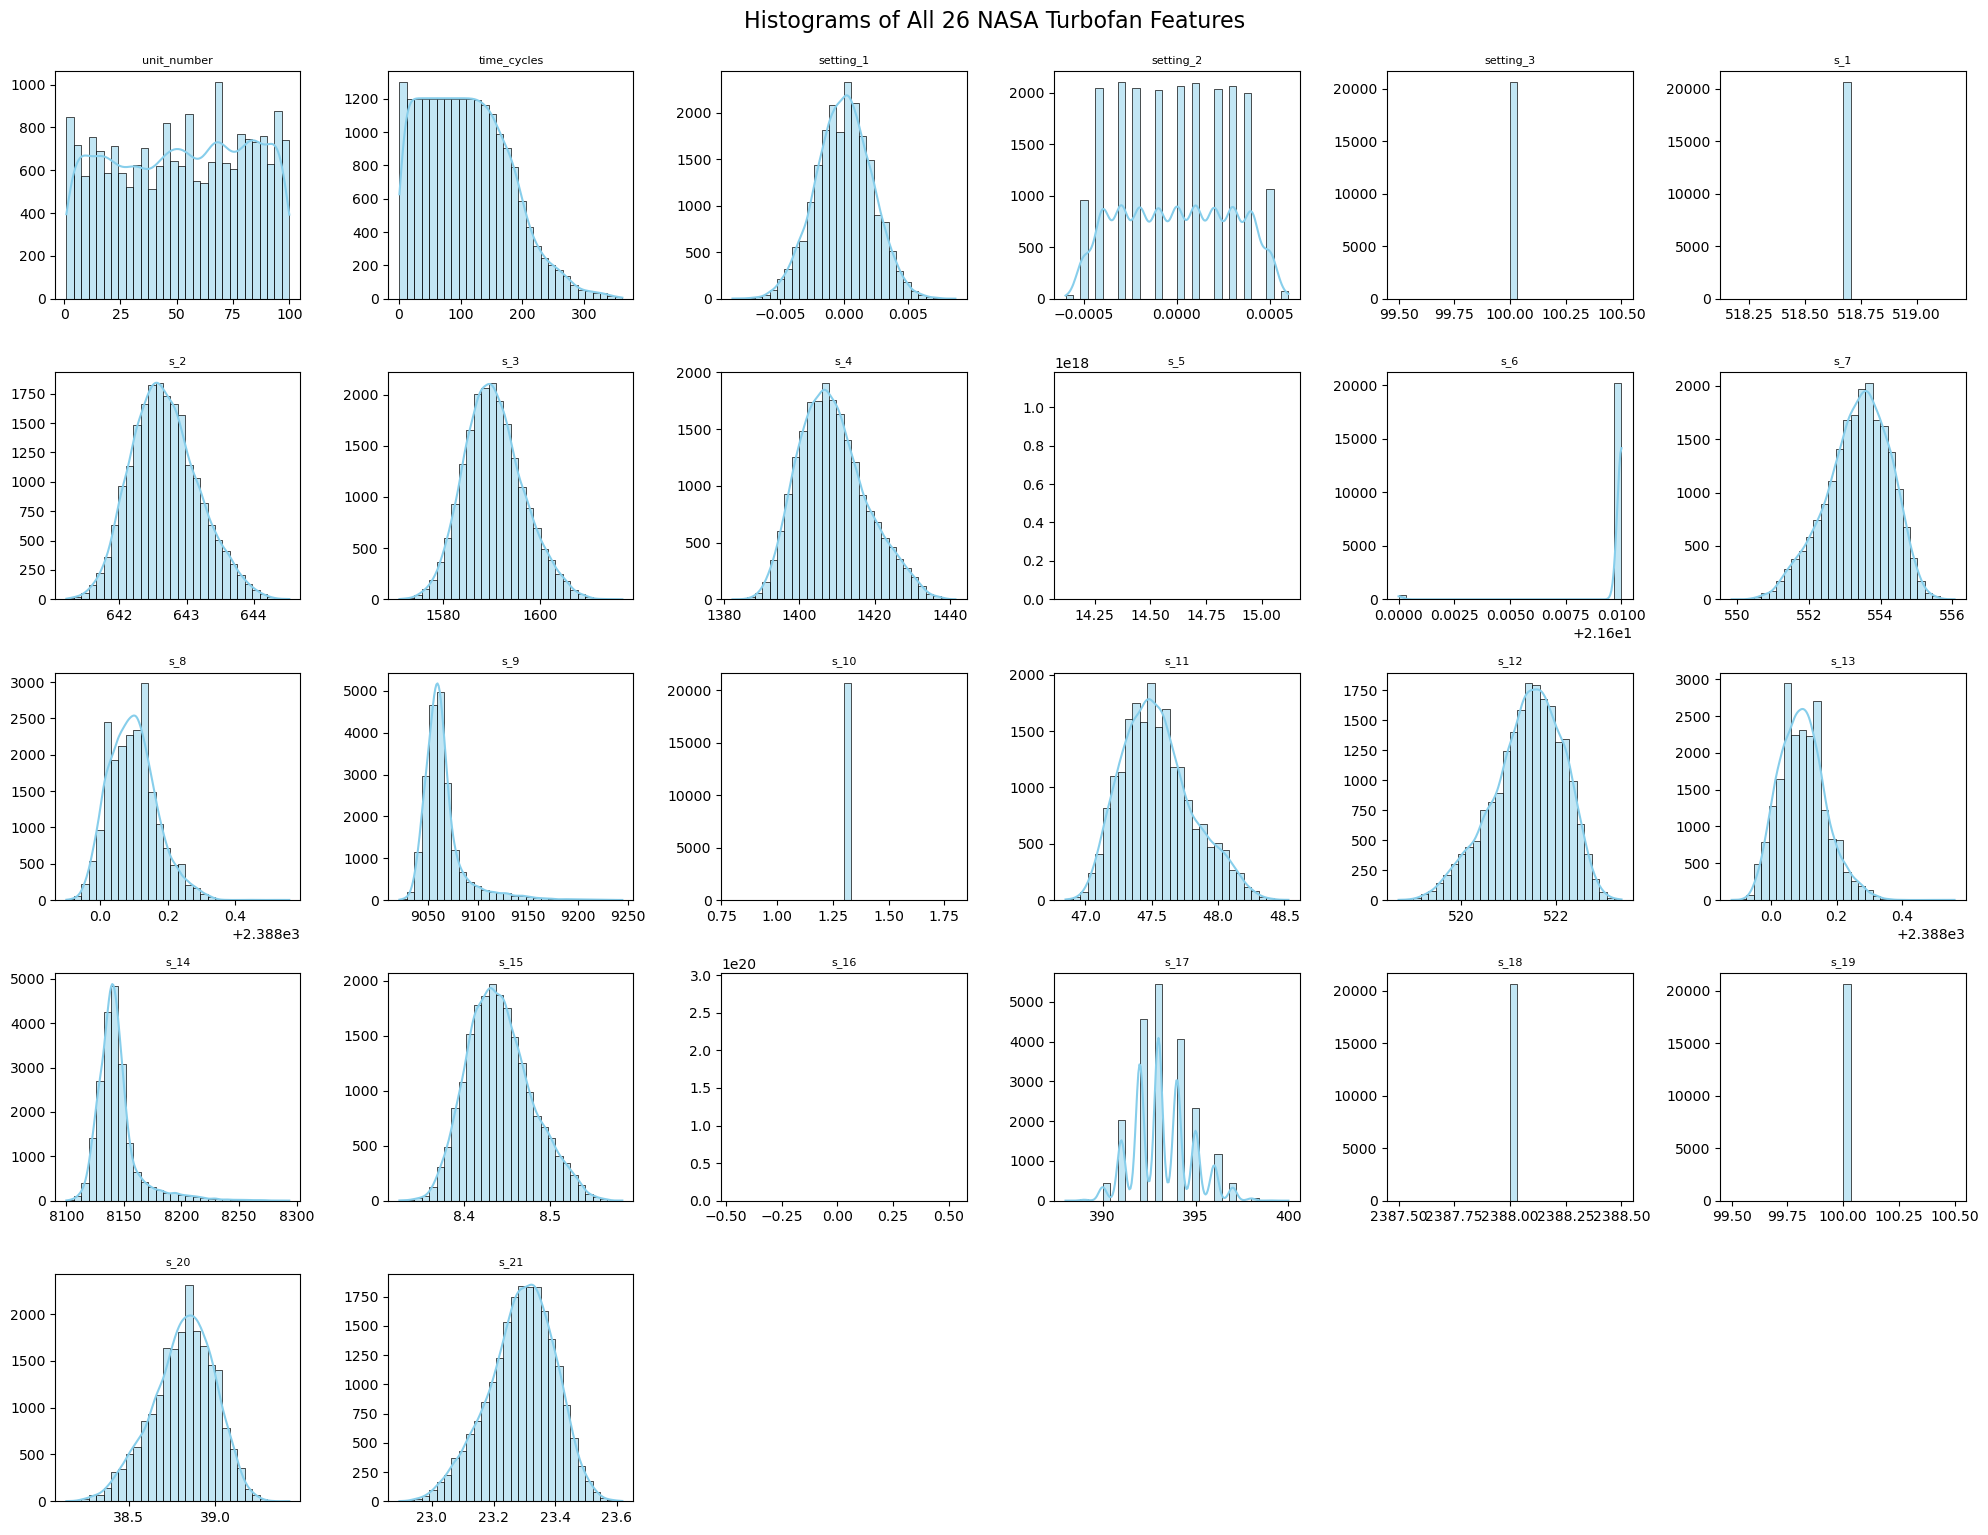

In [14]:
import math


# Get all column names
col_names = train.columns

# Define subplot grid
n_cols = 6
n_rows = math.ceil(len(col_names) / n_cols)

plt.figure(figsize=(20, n_rows * 3))

# Loop through columns properly
for i, col in enumerate(col_names):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(train[col], bins=30, color='skyblue', kde=True)
    plt.title(col, fontsize=8)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Histograms of All 26 NASA Turbofan Features", fontsize=16, y=1.02)
plt.show()


In [15]:
train.loc[:, ["unit_number", "time_cycles"]].describe()

,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


when aplaying descriptev stats of unit_number we can see that rhe dataset contains 206342 rows, and the unit number start with 1 and ends with 100 as expected, but what us really intersting is that the mean doesn't align perfectly  with the  quantiles with the descriptev stats of a vector form of 1-100,  this can be explained due to each unit having different max time_cycles and thus a different number of rows
When inspecting the max time_cycles you can see the engine which failed the earliest did so after 128 cycles, whereas the engine which operated the longest broke down after 362 cycles. The average engine breaks between 199 and 206 cycles as we see down there, however the standard deviation of 46 cycles is rather big. We’ll visualize this further down below to get an even better understanding.

In [16]:
max_cycles_per_unit = train.groupby('unit_number')['time_cycles'].max()

print("\nMax cycles for each unit:")
print(max_cycles_per_unit)

# Calculate the average of these maximum cycles
average_of_max_cycles = max_cycles_per_unit.mean()

print(f"\nAverage of the maximum cycles for each unit: {average_of_max_cycles:.2f}")


Max cycles for each unit:
unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycles, Length: 100, dtype: int64

Average of the maximum cycles for each unit: 206.31


now let's see the descriptive stats of the sansors we got 

In [17]:
train.loc[:, "s_1":].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


# Correlation with "Time" (Trend Analysis)
we focus on  how sensors are correlated with time_cycles

In [18]:
correation_matrix = train[sensor_names + ['time_cycles']].corr(method="pearson")

In [19]:
#remove time_cycles from the matrix (self correlaation)
time_corre = correation_matrix["time_cycles"].drop('time_cycles', axis=0)

In [20]:
#we gonna sort the correlation values
time_corre_sorted = time_corre.sort_values(ascending=False)

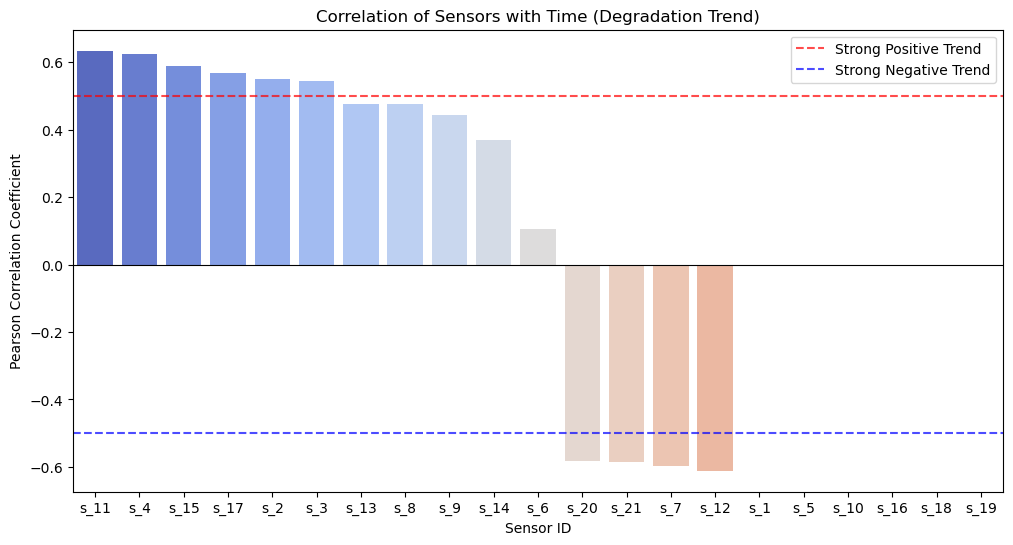

Most Positive Correlated Sensors (Rising Trend):
 s_11    0.634385
s_4     0.624577
s_15    0.588676
s_17    0.566995
s_2     0.549898
Name: time_cycles, dtype: float64

Most Negative Correlated Sensors (Falling Trend):
 s_5    NaN
s_10   NaN
s_16   NaN
s_18   NaN
s_19   NaN
Name: time_cycles, dtype: float64


In [21]:

# 4. Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=time_corre_sorted.index, y=time_corre_sorted.values, palette='coolwarm')

# Add threshold lines for visual reference
plt.axhline(0.5, color='red', linestyle='--', alpha=0.7, label='Strong Positive Trend')
plt.axhline(-0.5, color='blue', linestyle='--', alpha=0.7, label='Strong Negative Trend')
plt.axhline(0, color='black', linewidth=0.8)

plt.title('Correlation of Sensors with Time (Degradation Trend)')
plt.ylabel('Pearson Correlation Coefficient')
plt.xlabel('Sensor ID')
plt.legend()
plt.show()

# Print the numerical values for inspection
print("Most Positive Correlated Sensors (Rising Trend):\n", time_corre_sorted.head(5))
print("\nMost Negative Correlated Sensors (Falling Trend):\n", time_corre_sorted.tail(5))

In [22]:
# 1. Automatically pick the sensor with the highest absolute correlation
best_sensor = time_corre.abs().idxmax()
print(f"The strongest trend is found in: {best_sensor}")

The strongest trend is found in: s_11


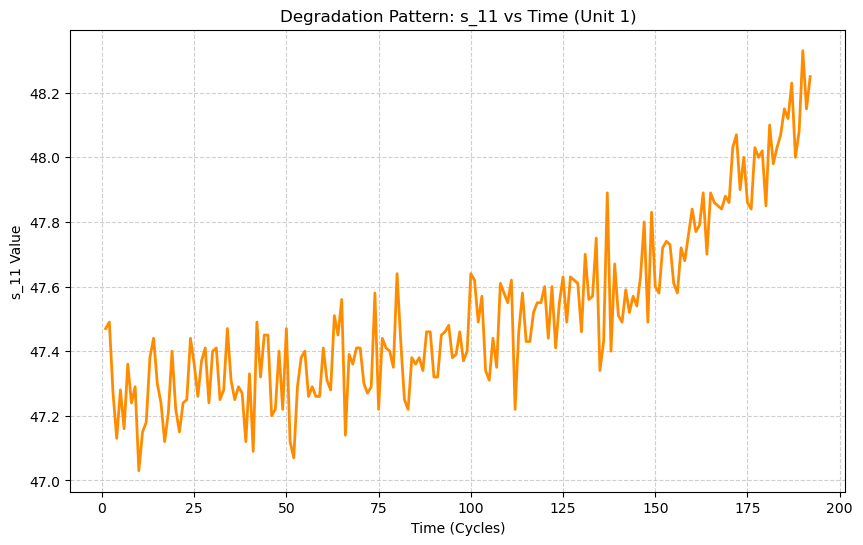

In [23]:
# 2. Filter data for just ONE engine (Unit 1)
# Plotting all engines at once would look like a messy hairball
unit_1_data = train[train['unit_number'] == 1]

# 3. Plot
plt.figure(figsize=(10, 6))
plt.plot(unit_1_data['time_cycles'], unit_1_data[best_sensor], linewidth=2, color='darkorange')

plt.title(f'Degradation Pattern: {best_sensor} vs Time (Unit 1)')
plt.xlabel('Time (Cycles)')
plt.ylabel(f'{best_sensor} Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [24]:
droped_featurs = ['setting_3','s_1', 's_5', 's_10', 's_16', 's_18', 's_19']
df_clean = train.drop(droped_featurs, axis=1)

In [25]:
# Drop the setting columns too if you only want to check Sensor correlations
df_sensors = df_clean.drop(['unit_number', 'setting_1', 'setting_2'], axis=1)

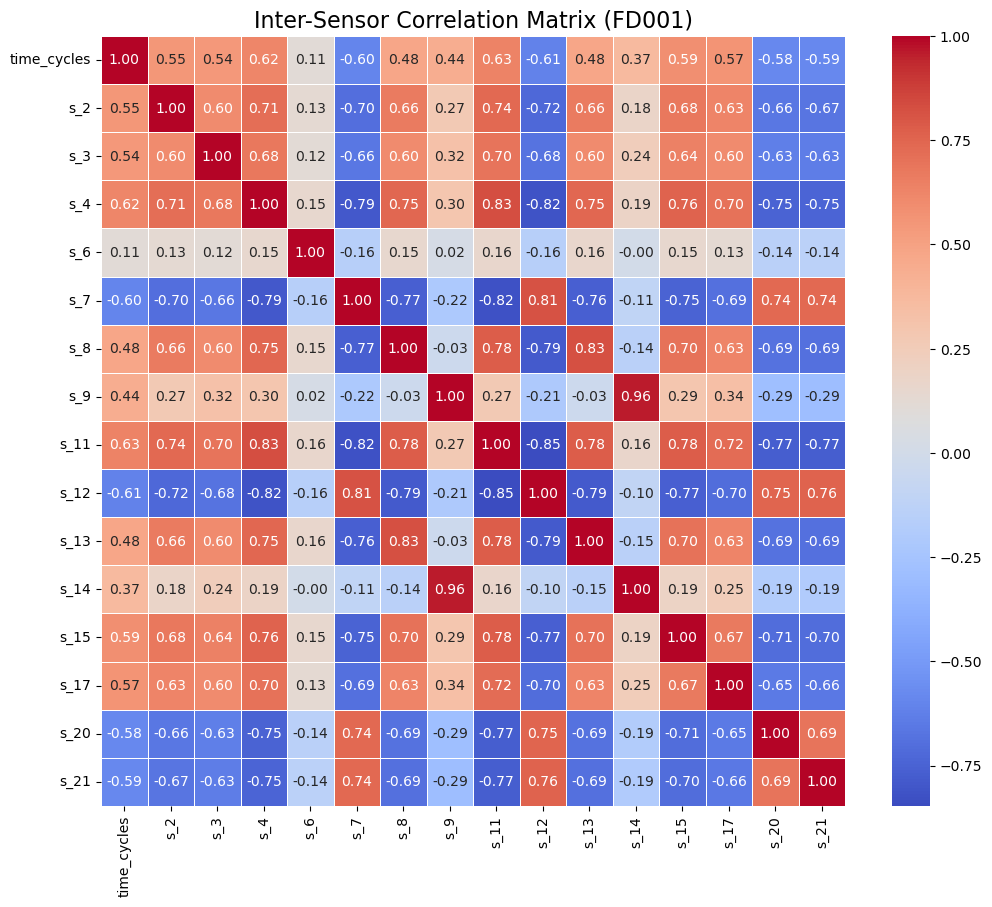

In [26]:
# 4. Calculate the Correlation Matrix
corr_matrix = df_sensors.corr()

# 5. Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,      # Show the numbers on the squares
            cmap='coolwarm', # Blue = Negative corr, Red = Positive corr
            fmt=".2f",       # Format to 2 decimal places
            linewidths=0.5)

plt.title('Inter-Sensor Correlation Matrix (FD001)', fontsize=16)
plt.show()

As we see that the sensor s_9 and the sensor s_14 is highly correlated so we gonna move one of them 

In [27]:
df_sensors.drop('s_9', axis=1, inplace=True)

In [28]:
df_sensors.head()

,time_cycles,s_2,s_3,s_4,s_6,s_7,s_8,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


# CALCULATE CORRELATION WITH TIME (TREND ANALYSIS)
to help use see which sensors move as 'time_cycles' increases

In [29]:
# We want to see which sensors move as 'time_cycles' increases
corre_with_tim = df_sensors.corrwith(df_sensors['time_cycles']).sort_values(ascending=False)

In [30]:
print("\n--- Sensor Correlation with Time (Trend Strength) ---")
print(corre_with_tim)


--- Sensor Correlation with Time (Trend Strength) ---
time_cycles    1.000000
s_11           0.634385
s_4            0.624577
s_15           0.588676
s_17           0.566995
s_2            0.549898
s_3            0.543947
s_13           0.477523
s_8            0.475977
s_14           0.370324
s_6            0.105980
s_20          -0.583597
s_21          -0.585923
s_7           -0.595914
s_12          -0.611354
dtype: float64


In [31]:
best_sensor = corre_with_tim.index[1]
worst_sensor = corre_with_tim.index[-1] 

# CREATE "HEALTHY" VS "CRITICAL" LABELS

In [32]:
def assign_health_label(engine_df):
    max_life = engine_df['time_cycles'].max()

    labels =[]
    for cycle in engine_df['time_cycles']:
        if cycle >= max_life - 15:
            labels.append('Critical')
        elif cycle <= max_life - 30:
            labels.append('Healthy')
        else:
                labels.append('Transition')

    engine_df['health_label'] = labels
    return engine_df
   

In [33]:
# Apply this logic to every unit
df_labeled = df_clean.groupby('unit_number', group_keys=False).apply(assign_health_label)

# PLOT BOXPLOTS

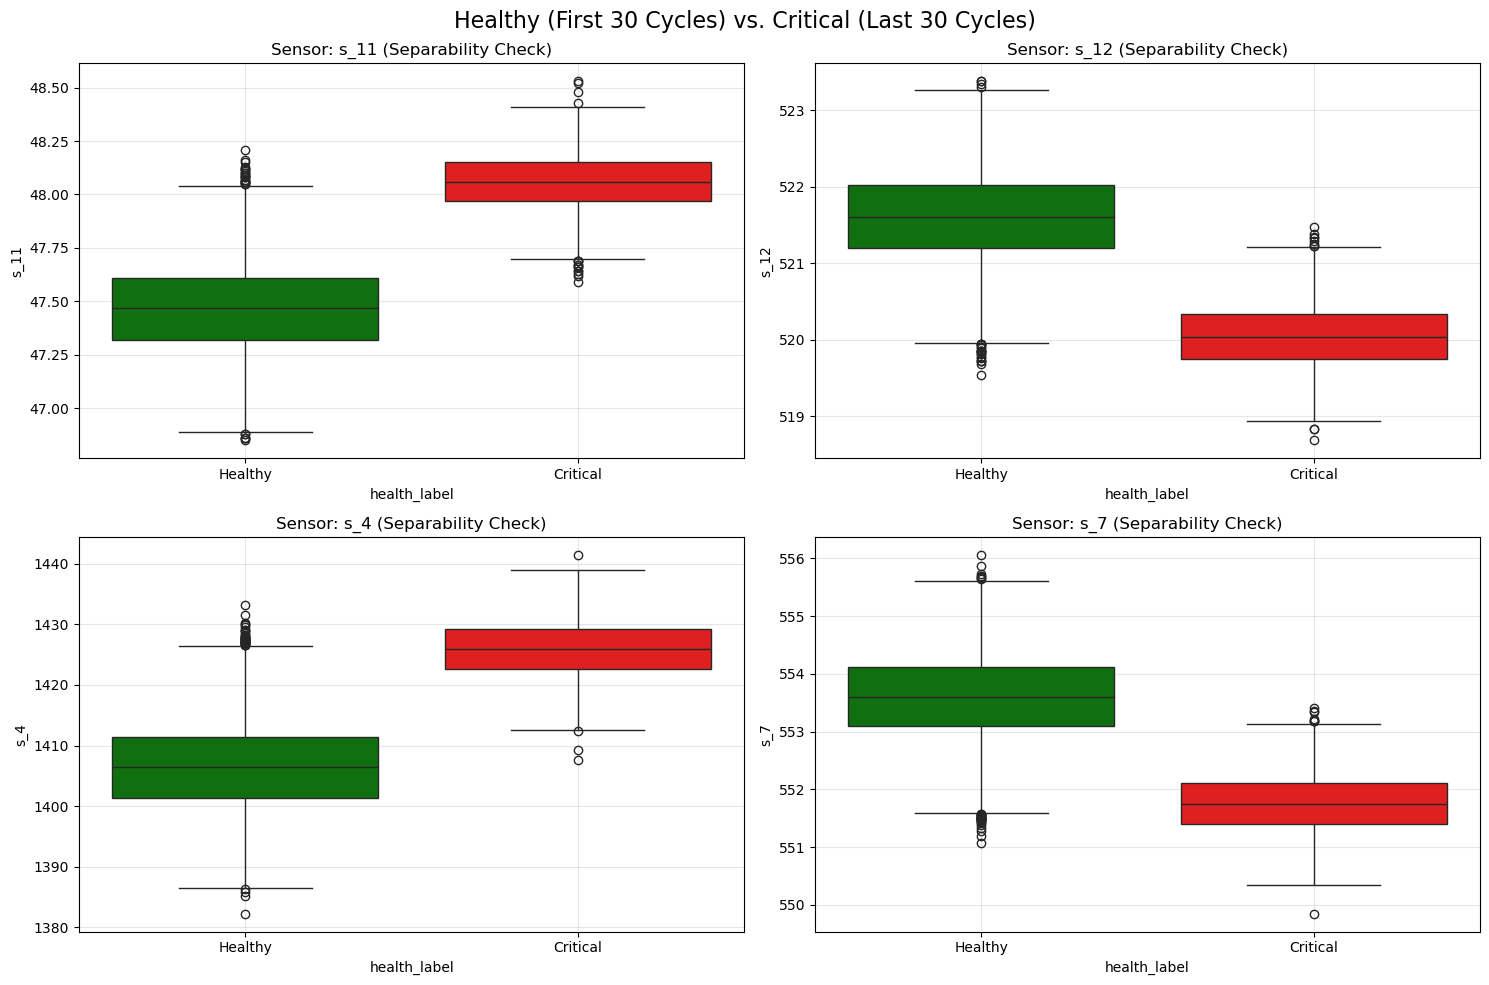

In [34]:
# Filter out the "Transition" phase to get clean separation plots
df_plot = df_labeled[df_labeled['health_label'] != 'Transition']

# We will plot the top 4 most responsive sensors
top_sensors = [best_sensor, worst_sensor, corre_with_tim.index[2], corre_with_tim.index[-2]]

plt.figure(figsize=(15, 10))
plt.suptitle('Healthy (First 30 Cycles) vs. Critical (Last 30 Cycles)', fontsize=16)

for i, sensor in enumerate(top_sensors):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='health_label', y=sensor, data=df_plot, palette={'Healthy': 'green', 'Critical': 'red'})
    plt.title(f'Sensor: {sensor} (Separability Check)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

We see fro some sansors that the Green box ("Healthy") at the bottom and the Red box ("Critical") at the top (or vice versa fro others), with very little overlap. This means the model can easily distinguish a broken machine from a working one.

# SELECT A "NOISY" SENSOR AND A SPECIFIC UNIT
Sensor 11 (Static Pressure) is a great example of a good trend with high noise

In [36]:
sensor = 's_11'
unit_id = [1, 2]
df_unit = train[train['unit_number'].isin(unit_id)].copy()

In [37]:
df_unit.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [39]:
window_size = 15
df_unit['rolling_mean'] = df_unit.groupby('unit_number')[sensor].transform(
    lambda x: x.rolling(window=window_size).mean()
)

df_unit['rolling_std'] = df_unit.groupby('unit_number')[sensor].transform(
    lambda x: x.rolling(window=window_size).std()
)

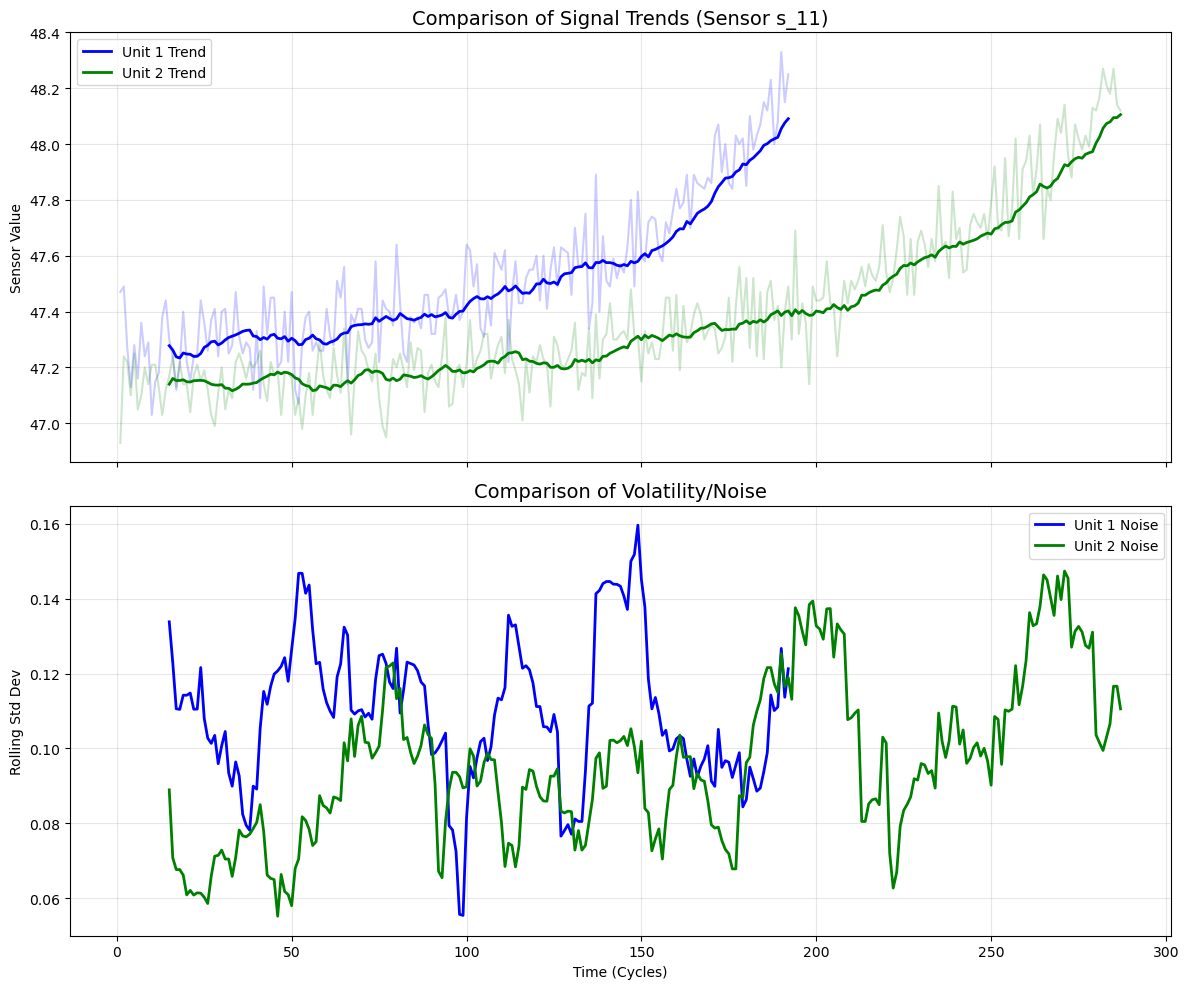

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

colors = {1: 'blue', 2: 'green'}

for unit in unit_id:

    subset = df_unit[df_unit['unit_number'] == unit]
    c= colors[unit]

    # Plot 1: Signal (Rolling Mean vs Raw)
    # We make Raw faint (alpha=0.2) so we can see the trend lines clearly

    ax1.plot(subset['time_cycles'], subset[sensor], color=c, alpha=0.2) 
    ax1.plot(subset['time_cycles'], subset['rolling_mean'], color=c, linewidth=2, label=f'Unit {unit} Trend')

    # Plot 2: Noise (Rolling Std)
    ax2.plot(subset['time_cycles'], subset['rolling_std'], color=c, linewidth=2, label=f'Unit {unit} Noise')

# Formatting Plot 1
ax1.set_title(f'Comparison of Signal Trends (Sensor {sensor})', fontsize=14)
ax1.set_ylabel('Sensor Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Formatting Plot 2
ax2.set_title('Comparison of Volatility/Noise', fontsize=14)
ax2.set_xlabel('Time (Cycles)')
ax2.set_ylabel('Rolling Std Dev')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
    


# we conclue that :
**Identical Physics:** Both engines follow the exact same curve shape. This makes it easy for an AI to learn.

**Clear Failure Threshold:** Both units failed when the sensor hit ~48.1. The model just needs to predict when this value will be reached.

**Smoothing is Essential:** The background raw data is too jagged. You must use the Rolling Mean (or an LSTM) to filter the noise.

**Ignore Volatility:** The bottom graph (Rolling Std) is messy and doesn't show a clear trend. Focus on the value (top graph), not the variance.